#                Project – Document Classification (P114)

# @Author   Siddhartha Sarkar

#  Problem Statements:
**Today the major problem being faced across the industry is how to acquire the right talent, using minimal resources  over the internet and in minimal time. As described there are  three major challenges that are required to   be overcome, to bring efficiencies to the complete process.**

•-> Separating the right candidates from the pack

•-> Making sense of candidate CVs

•-> Knowing that candidates can do the job before you hire them

#  Business objective- 

## The document classification solution should significantly reduce the manual human effort in the HRM and financial department. It should achieve a higher level of accuracy and automation with minimal human intervention.


# Import Necessary Libreries

In [1]:
import spacy
import pickle
import random
import docs
from spacy import displacy
#!pip install spacy
import warnings
warnings.filterwarnings("ignore")
import glob
import docx
import glob
import warnings
warnings.filterwarnings("ignore")
import spacy
import pickle
import random
import docs
from spacy import displacy
import docx
import spacy
from spacy import schemas
from spacy import Dict
from spacy import displacy
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import doc
import textract
import antiword
from PyPDF2 import PdfFileReader
import re
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from spacy.matcher import Matcher
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_trf")
import doc
import textract
import antiword
from PyPDF2 import PdfFileReader
import re
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from spacy.matcher import Matcher
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
import docx
import glob
import doc
import textract
import antiword
from PyPDF2 import PdfFileReader
import re
import re
import nltk

# Import Data

# For Sql developer resumes

In [3]:
path='./ResumesCopy/SQL Developer Lightning insight/'
all_files=glob.glob(path + "/*.docx")
all_files

['./ResumesCopy/SQL Developer Lightning insight\\Anil kumar.docx',
 './ResumesCopy/SQL Developer Lightning insight\\AradhanaTripathi[4_0].docx',
 './ResumesCopy/SQL Developer Lightning insight\\Buddha Vamsi.docx',
 './ResumesCopy/SQL Developer Lightning insight\\kamballapradeep.docx',
 './ResumesCopy/SQL Developer Lightning insight\\Nazeer-Basha.docx',
 './ResumesCopy/SQL Developer Lightning insight\\Neeraj Mishra.docx',
 './ResumesCopy/SQL Developer Lightning insight\\premsai.docx',
 './ResumesCopy/SQL Developer Lightning insight\\PSyamKumar[2_3].docx',
 './ResumesCopy/SQL Developer Lightning insight\\Rajupavanakumari[2_10].docx',
 './ResumesCopy/SQL Developer Lightning insight\\Ramalakshmi K.docx',
 './ResumesCopy/SQL Developer Lightning insight\\RameshNataru[3_4].docx',
 './ResumesCopy/SQL Developer Lightning insight\\Tatikonda-Kiran-Kumar (1).docx',
 './ResumesCopy/SQL Developer Lightning insight\\Vinod B.docx']

In [4]:
def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)


In [5]:
li=[]
for filename in all_files:
    dummy_1=readtxt(filename)
    li.append(dummy_1)
    

In [6]:
import pandas as pd

In [7]:
dataframe=pd.DataFrame()

In [8]:
for files in all_files:
    print(files)
    dataframe["cv"]=li

./ResumesCopy/SQL Developer Lightning insight\Anil kumar.docx
./ResumesCopy/SQL Developer Lightning insight\AradhanaTripathi[4_0].docx
./ResumesCopy/SQL Developer Lightning insight\Buddha Vamsi.docx
./ResumesCopy/SQL Developer Lightning insight\kamballapradeep.docx
./ResumesCopy/SQL Developer Lightning insight\Nazeer-Basha.docx
./ResumesCopy/SQL Developer Lightning insight\Neeraj Mishra.docx
./ResumesCopy/SQL Developer Lightning insight\premsai.docx
./ResumesCopy/SQL Developer Lightning insight\PSyamKumar[2_3].docx
./ResumesCopy/SQL Developer Lightning insight\Rajupavanakumari[2_10].docx
./ResumesCopy/SQL Developer Lightning insight\Ramalakshmi K.docx
./ResumesCopy/SQL Developer Lightning insight\RameshNataru[3_4].docx
./ResumesCopy/SQL Developer Lightning insight\Tatikonda-Kiran-Kumar (1).docx
./ResumesCopy/SQL Developer Lightning insight\Vinod B.docx


In [9]:
dataframe

cv
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...
2   BUDDHA VAMSI                                  ...
3   KAMBALLA PRADEEP                              ...
4   Admin\n2021-11-01\n\n\n\n\n“ Hyderabad\nNazeer...
5    \n                                        Res...
6   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...
7                                          SQL SER...
8    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...
9                                       resume\n\n...
10  Name: Ramesh\n\nCareer Objective: \n          ...
11  Dinesh Reddy\n2021-11-01\n\n\nCareer objective...
12  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...

In [10]:
label_list=[]
for i in range (len(all_files)):
    label="SQLDeveloper"
    label_list.append(label)
    

In [11]:
dataframe["label"]=label_list

In [12]:
dataframe

cv         label
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...  SQLDeveloper
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...  SQLDeveloper
2   BUDDHA VAMSI                                  ...  SQLDeveloper
3   KAMBALLA PRADEEP                              ...  SQLDeveloper
4   Admin\n2021-11-01\n\n\n\n\n“ Hyderabad\nNazeer...  SQLDeveloper
5    \n                                        Res...  SQLDeveloper
6   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...  SQLDeveloper
7                                          SQL SER...  SQLDeveloper
8    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...  SQLDeveloper
9                                       resume\n\n...  SQLDeveloper
10  Name: Ramesh\n\nCareer Objective: \n          ...  SQLDeveloper
11  Dinesh Reddy\n2021-11-01\n\n\nCareer objective...  SQLDeveloper
12  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...  SQLDeveloper

# for workday resumes

In [13]:
path1='./ResumesCopy/workday resumes/'
all_files1=glob.glob(path1 + "/*.docx")
all_files1

['./ResumesCopy/workday resumes\\ChinnaSubbarayuduM_Hexaware.docx',
 './ResumesCopy/workday resumes\\Gopi Krishna_Hexaware.docx',
 './ResumesCopy/workday resumes\\Hari-Krishna-M-Hexaware.docx',
 './ResumesCopy/workday resumes\\Harikrishna-Akula-Hexaware.docx',
 './ResumesCopy/workday resumes\\Hima-Mendu-Hexaware.docx',
 './ResumesCopy/workday resumes\\Himaja G_(Hexaware).docx',
 './ResumesCopy/workday resumes\\J-Sumanth-Royal-Hexaware.docx',
 './ResumesCopy/workday resumes\\Jyotiverma_Heaware.docx',
 './ResumesCopy/workday resumes\\Madeeswar-A-Hexaware.docx',
 './ResumesCopy/workday resumes\\MooraboyinaGuravaiah_Hexaware.docx',
 './ResumesCopy/workday resumes\\Naresh-Babu-Cherukuri-Hexaware.docx',
 './ResumesCopy/workday resumes\\P V Sai Krishna_ Hexaware.docx',
 './ResumesCopy/workday resumes\\Punugoti-Swetha-Hexaware.docx',
 './ResumesCopy/workday resumes\\RahulM_Hexaware.docx',
 './ResumesCopy/workday resumes\\RameshP_Hexaware.docx',
 './ResumesCopy/workday resumes\\ShireeshKumar-He

In [14]:
li1=[]
for filename1 in all_files1:
    dummy_11=readtxt(filename1)
    li1.append(dummy_11)
    

In [15]:
dataframe1=pd.DataFrame()

In [16]:
for files in all_files1:
    print(files)
    dataframe1["cv"]=li1

./ResumesCopy/workday resumes\ChinnaSubbarayuduM_Hexaware.docx
./ResumesCopy/workday resumes\Gopi Krishna_Hexaware.docx
./ResumesCopy/workday resumes\Hari-Krishna-M-Hexaware.docx
./ResumesCopy/workday resumes\Harikrishna-Akula-Hexaware.docx
./ResumesCopy/workday resumes\Hima-Mendu-Hexaware.docx
./ResumesCopy/workday resumes\Himaja G_(Hexaware).docx
./ResumesCopy/workday resumes\J-Sumanth-Royal-Hexaware.docx
./ResumesCopy/workday resumes\Jyotiverma_Heaware.docx
./ResumesCopy/workday resumes\Madeeswar-A-Hexaware.docx
./ResumesCopy/workday resumes\MooraboyinaGuravaiah_Hexaware.docx
./ResumesCopy/workday resumes\Naresh-Babu-Cherukuri-Hexaware.docx
./ResumesCopy/workday resumes\P V Sai Krishna_ Hexaware.docx
./ResumesCopy/workday resumes\Punugoti-Swetha-Hexaware.docx
./ResumesCopy/workday resumes\RahulM_Hexaware.docx
./ResumesCopy/workday resumes\RameshP_Hexaware.docx
./ResumesCopy/workday resumes\ShireeshKumar-Hexaware.docx
./ResumesCopy/workday resumes\Sri-Krishna-S-Hexaware.docx
./Resume

In [17]:
label_list1=[]
for i in range (len(all_files1)):
    label1="workdayResumes"
    label_list1.append(label1)
    

In [18]:
dataframe1["label"]=label_list1

In [19]:
dataframe1

cv           label
0   Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...  workdayResumes
1   \t\n\n\nName         : Gopi Krishna Reddy\n\t\...  workdayResumes
2   vijay reddy\n2021-11-01\n\nHari Krishna M\nSum...  workdayResumes
3   Shashi .\n2021-11-01\n\nHarikrishna Akula\n Su...  workdayResumes
4   Siri Subramanyam\n2021-11-01\n\nHIMA.MENDU\nCa...  workdayResumes
5                                         \n      ...  workdayResumes
6   HOME\n2021-11-01\n\n[pic] Name: J. Sumanth Roy...  workdayResumes
7   \n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...  workdayResumes
8   Dhwani S\ndhwani\n2021-11-01\n\nMadeeswar A\nP...  workdayResumes
9   \n\nMooraboyina Guravaiah\nWorkday Integration...  workdayResumes
10  Siri Subramanyam\n2021-11-01\n\nName : Naresh ...  workdayResumes
11  VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...  workdayResumes
12  Siri Subramanyam\n2021-11-01\n\n[pic]\n[pic]\n...  workdayResumes
13  Rahul  (Techno Functional Consultant)  \nProfe...  workdayResumes
14  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workdayResumes
15  Guest\n2021-11-01\n\nShireesh Balasani \nHCM C...  workdayResumes
16  swamy sarnala\n2021-11-01\n\nWorkday Integrati...  workdayResumes
17  Seeking suitable positions in Workday HCM  as ...  workdayResumes
18  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  workdayResumes
19  Mathu Kumaran\nvenki\n2021-11-01\n\nVenkateswa...  workdayResumes
20                                                ...  workdayResumes

# peoplesoft resumes

In [20]:
path2='./ResumesCopy/Peoplesoft resumes/'
all_files2=glob.glob(path2 + "/*.docx")
all_files2

['./ResumesCopy/Peoplesoft resumes\\Peoplesoft Admin_AnubhavSingh.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft Admin_G Ananda Rayudu (1).docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft Admin_Gangareddy.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft Admin_Murali.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft Admin_SirazuddinMohammad.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft Admin_Varkala Vikas.docx',
 './ResumesCopy/Peoplesoft resumes\\PeopleSoft DBA_Vivekanand Sayana.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft FSCM_HariNarayana.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft FSCM_Murali.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft FSCM_PriyabrataHota.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft FSCM_SUJATHA.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft-Admin_Priyanka-Ramadoss.docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft-Admin_srinivasarao (1).docx',
 './ResumesCopy/Peoplesoft resumes\\Peoplesoft

In [21]:
li2=[]
for filename2 in all_files2:
    dummy_12=readtxt(filename2)
    li2.append(dummy_12)
    

In [22]:
dataframe2=pd.DataFrame()

In [23]:
for files in all_files2:
    print(files)
    dataframe2["cv"]=li2

./ResumesCopy/Peoplesoft resumes\Peoplesoft Admin_AnubhavSingh.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft Admin_G Ananda Rayudu (1).docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft Admin_Gangareddy.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft Admin_Murali.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft Admin_SirazuddinMohammad.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft Admin_Varkala Vikas.docx
./ResumesCopy/Peoplesoft resumes\PeopleSoft DBA_Vivekanand Sayana.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft FSCM_HariNarayana.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft FSCM_Murali.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft FSCM_PriyabrataHota.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft FSCM_SUJATHA.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft-Admin_Priyanka-Ramadoss.docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft-Admin_srinivasarao (1).docx
./ResumesCopy/Peoplesoft resumes\Peoplesoft-Admin_Vinod-Akkala.docx
./ResumesCopy/Peoplesoft resumes\PeopleSoft

In [24]:
label_list2=[]
for i in range (len(all_files2)):
    label2="Peoplesoft"
    label_list2.append(label2)
    

In [25]:
dataframe2["label"]=label_list2

In [26]:
dataframe2

cv       label
0     Anubhav Kumar Singh\t\t\n\n  To work in a gl...  Peoplesoft
1   \n\n\n\n\n\n\t\n\nProfile Summary:\t\t\t\t\t\t...  Peoplesoft
2   PeopleSoft Database Administrator\n           ...  Peoplesoft
3   Murali\n\nExperience Summary \n\nI have 6 year...  Peoplesoft
4   \n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...  Peoplesoft
5    PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...  Peoplesoft
6   PeopleSoft Administration\n \nVivekanand Sayan...  Peoplesoft
7   \nHaving 4.6 years of experience in PeopleSoft...  Peoplesoft
8   \nHaving 4.6 years of experience in PeopleSoft...  Peoplesoft
9    \n\nCAREER OBJECTIVE\t\t\n\nPursuing Peopleso...  Peoplesoft
10  Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...  Peoplesoft
11  Priyanka Ramadoss\n61/46, MountPleasant, \nCoo...  Peoplesoft
12  PEOPLESOFT Administrator\n\n\nSRINIVAS.K \t\t\...  Peoplesoft
13  Vinod Akkala                                  ...  Peoplesoft
14   PeopleSoft Admin/PeopleSoft DBA\n\nGanesh All...  Peoplesoft
15  Arun Venu\n\n  EXPERIENCE SUMMARY\t\n\nExperie...  Peoplesoft
16  \n\n\n\n\nExperience Summary\n4.1 years- Exper...  Peoplesoft
17  Rahul Ahuja\n---------------------------------...  Peoplesoft
18  \nR Ahmed                                     ...  Peoplesoft
19  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...  Peoplesoft

# React resumes

In [27]:
path3='./ResumesCopy/React_Developer/'
all_files3=glob.glob(path3 + "/*.docx")
all_files3

['./ResumesCopy/React_Developer\\React Developer_Deepakreddy.docx',
 './ResumesCopy/React_Developer\\React Developer_Haripriya.docx',
 './ResumesCopy/React_Developer\\React Developer_Kamalakar Reddy.docx',
 './ResumesCopy/React_Developer\\React Developer_Naveen sadhu.docx',
 './ResumesCopy/React_Developer\\React Developer_Pragnya.docx',
 './ResumesCopy/React_Developer\\React Developer_Sarala Madasu-converted.docx',
 './ResumesCopy/React_Developer\\React Developer_Thirupathiamma.docx',
 './ResumesCopy/React_Developer\\React Dev_Krishna Kanth.docx',
 './ResumesCopy/React_Developer\\React Dev_Krishna Kanth_Musquare Technologies.docx',
 './ResumesCopy/React_Developer\\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 './ResumesCopy/React_Developer\\React JS Developer_Venkatalakshmi (1)-converted.docx',
 './ResumesCopy/React_Developer\\React-Developer-PavasGoswami.docx',
 './ResumesCopy/React_Developer\\React-Developer-Vinay-Reddy.docx',
 './ResumesCopy/React_Developer\\React-

In [28]:
li3=[]
for filename3 in all_files3:
    dummy_13=readtxt(filename3)
    li3.append(dummy_13)
    

In [29]:
dataframe3=pd.DataFrame()

In [30]:
for files in all_files3:
    print(files)
    dataframe3["cv"]=li3

./ResumesCopy/React_Developer\React Developer_Deepakreddy.docx
./ResumesCopy/React_Developer\React Developer_Haripriya.docx
./ResumesCopy/React_Developer\React Developer_Kamalakar Reddy.docx
./ResumesCopy/React_Developer\React Developer_Naveen sadhu.docx
./ResumesCopy/React_Developer\React Developer_Pragnya.docx
./ResumesCopy/React_Developer\React Developer_Sarala Madasu-converted.docx
./ResumesCopy/React_Developer\React Developer_Thirupathiamma.docx
./ResumesCopy/React_Developer\React Dev_Krishna Kanth.docx
./ResumesCopy/React_Developer\React Dev_Krishna Kanth_Musquare Technologies.docx
./ResumesCopy/React_Developer\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx
./ResumesCopy/React_Developer\React JS Developer_Venkatalakshmi (1)-converted.docx
./ResumesCopy/React_Developer\React-Developer-PavasGoswami.docx
./ResumesCopy/React_Developer\React-Developer-Vinay-Reddy.docx
./ResumesCopy/React_Developer\React-JS-Developer-AnjaniPriyada.docx
./ResumesCopy/React_Developer\Reactj

In [31]:
label_list3=[]
for i in range (len(all_files3)):
    label3="ReactDeveloper"
    label_list3.append(label3)
    

In [32]:
dataframe3["label"]=label_list3

In [33]:
dataframe3

cv           label
0   Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...  ReactDeveloper
1   HARIPRIYA BATTINA \nExperience as UI Developer...  ReactDeveloper
2   KAMALAKAR REDDY. A \nLinked In: https://www.li...  ReactDeveloper
3   \nNaveen Sadhu\n\n\nTitle: software developer\...  ReactDeveloper
4    \nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...  ReactDeveloper
5   \n\n 204,Sri geethika prestige,road number 10...  ReactDeveloper
6   \n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...  ReactDeveloper
7   \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
8   \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
9   Kotani Durga Prasad\n\n\nObjective:\n\nAspiran...  ReactDeveloper
10  Venkatalakshmi Pedireddy\nSoftware Developer\n...  ReactDeveloper
11  Siri Subramanyam\n2021-11-01\n\n[pic]\nPROFILE...  ReactDeveloper
12  Siri Subramanyam\n2021-11-01\n\nMaryala Vinay ...  ReactDeveloper
13  Deepchand\ninferno\n2021-11-01\n\nCURRICULUM V...  ReactDeveloper
14  KAMBALA SAI SURENDRA   \n \n\tMandepeta \t \n ...  ReactDeveloper
15  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...  ReactDeveloper
16  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  ReactDeveloper
17  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  ReactDeveloper
18  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper
19  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper
20  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper

# Internship resumes

In [34]:
path4='./ResumesCopy/Internship/'
all_files4=glob.glob(path4 + "/*.docx")
all_files4

['./ResumesCopy/Internship\\Internship_Ravali_Musquare Technologies (1).docx',
 './ResumesCopy/Internship\\Internship_Susovan Bag_Musquare Technologies.docx']

In [35]:
li4=[]
for filename4 in all_files4:
    dummy_14=readtxt(filename4)
    li4.append(dummy_14)
    

In [36]:
dataframe4=pd.DataFrame()

In [37]:
for files in all_files4:
    print(files)
    dataframe4["cv"]=li4

./ResumesCopy/Internship\Internship_Ravali_Musquare Technologies (1).docx
./ResumesCopy/Internship\Internship_Susovan Bag_Musquare Technologies.docx


In [38]:
label_list4=[]
for i in range (len(all_files4)):
    label4="Internship"
    label_list4.append(label4)
    

In [39]:
dataframe4["label"]=label_list4

In [40]:
dataframe4

cv       label
0  Name: Ravali P \n\n                           ...  Internship
1    \nSUSOVAN  BAG   \nSeeking  a  challenging  ...  Internship

# Final dataframe

In [41]:
final=pd.concat([dataframe,dataframe1,dataframe2,dataframe3,dataframe4],axis=0)
final=final.reset_index()
final=final.drop(columns='index',axis=0)
final

cv           label
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...    SQLDeveloper
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...    SQLDeveloper
2   BUDDHA VAMSI                                  ...    SQLDeveloper
3   KAMBALLA PRADEEP                              ...    SQLDeveloper
4   Admin\n2021-11-01\n\n\n\n\n“ Hyderabad\nNazeer...    SQLDeveloper
..                                                ...             ...
72  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper
73  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper
74  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper
75  Name: Ravali P \n\n                           ...      Internship
76    \nSUSOVAN  BAG   \nSeeking  a  challenging  ...      Internship

[77 rows x 2 columns]

# Different Categories 

In [42]:
final.label.value_counts()

workdayResumes    21
ReactDeveloper    21
Peoplesoft        20
SQLDeveloper      13
Internship         2
Name: label, dtype: int64

In [43]:
print ("Displaying the distinct categories of resume -")
print (final.label.unique())

Displaying the distinct categories of resume -
['SQLDeveloper' 'workdayResumes' 'Peoplesoft' 'ReactDeveloper'
 'Internship']


In [44]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (final.label
       .value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
workdayResumes    21
ReactDeveloper    21
Peoplesoft        20
SQLDeveloper      13
Internship         2
Name: label, dtype: int64


# Bar Plot

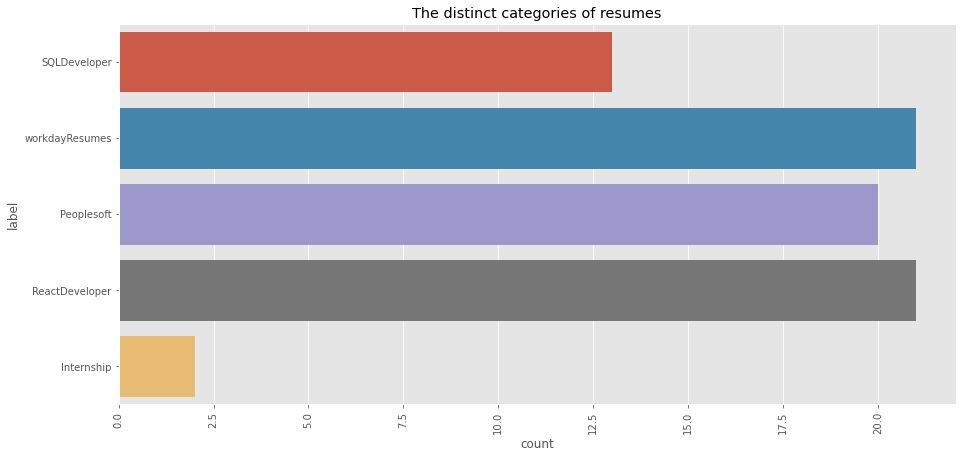

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="label", data=final,color=None)
plt.show()

In [46]:
import numpy as np

# Pie Plot

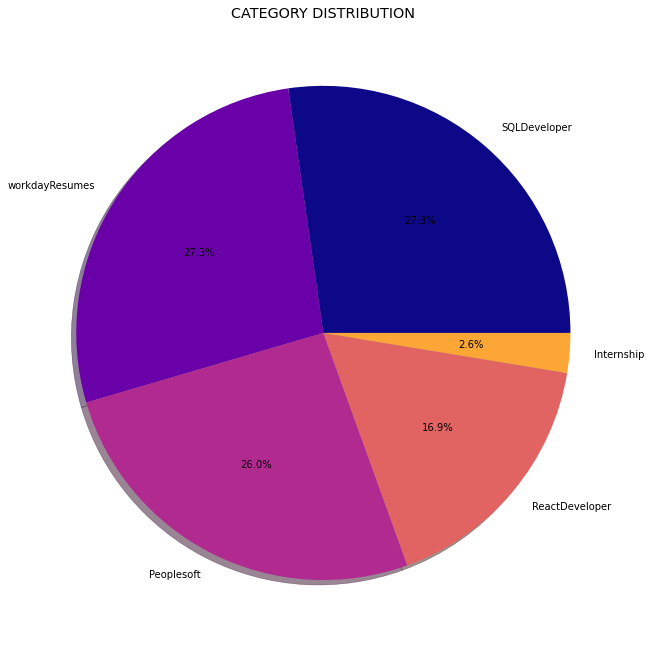

In [47]:
from matplotlib.gridspec import GridSpec
targetCounts = final.label.value_counts()
targetLabels  = final.label.unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [48]:
import plotly.express as px

In [49]:
px.pie(data_frame=final,names="label",values=None,hover_name=None,
    hover_data=None,hole=0.05,)

In [50]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Exploretory Data Analysis(EDA)

## Text PreProcessing

In [51]:
stopwords=list(STOP_WORDS)
stopwords

['along',
 'become',
 'no',
 'across',
 '‘ve',
 'but',
 'between',
 'make',
 'throughout',
 'latter',
 'amongst',
 'namely',
 'third',
 'me',
 'go',
 '’s',
 'down',
 'his',
 'against',
 'almost',
 're',
 'keep',
 'out',
 'there',
 'had',
 'yet',
 'perhaps',
 'thus',
 'whoever',
 'please',
 'yourself',
 'all',
 'hundred',
 'in',
 'noone',
 'some',
 'else',
 'they',
 'n‘t',
 'five',
 'towards',
 'becoming',
 'however',
 'been',
 'fifty',
 "'re",
 'either',
 'was',
 'them',
 'anything',
 'ourselves',
 '‘m',
 'she',
 'those',
 'full',
 'always',
 'made',
 'somewhere',
 'hers',
 'call',
 'see',
 'twelve',
 "'ve",
 'just',
 'were',
 'whenever',
 'now',
 'without',
 '‘ll',
 'any',
 'that',
 'to',
 'besides',
 'himself',
 'did',
 'somehow',
 'whatever',
 'whose',
 'once',
 'afterwards',
 'hereafter',
 'are',
 'thence',
 'others',
 'anyway',
 'only',
 'during',
 'well',
 'beside',
 'when',
 'with',
 'nor',
 'twenty',
 'whether',
 'whereupon',
 "'s",
 'quite',
 'why',
 'one',
 'ca',
 'myself',
 

In [52]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


##  Cleaning Resume Text
**We are going to use nltk library to clean our dataset in a few steps:**

->We are going to use regex to remove hyperlinks, special characters, or punctuations.

->Lowering text

->Splitting text into array based on space

->Lemmatizing text to its base form for normalizations

->Removing English stopwords

->Appending the results into an array

##  Segmentation and Lemmatisation and Normalisation

##  Create a Function

In [53]:
clean = []
lz = WordNetLemmatizer()
for i in range(final.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        final["cv"].iloc[i],
    )
    review = re.sub(r"[0-9]+", " ", review) # Remove Numbers
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [ lz.lemmatize(word) for word in review if word not in STOP_WORDS]
    review = " ".join(review)
    clean.append(review)

In [54]:
final["Clean_Resume"] = clean

In [55]:
final

cv           label  \
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...    SQLDeveloper   
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...    SQLDeveloper   
2   BUDDHA VAMSI                                  ...    SQLDeveloper   
3   KAMBALLA PRADEEP                              ...    SQLDeveloper   
4   Admin\n2021-11-01\n\n\n\n\n“ Hyderabad\nNazeer...    SQLDeveloper   
..                                                ...             ...   
72  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper   
73  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper   
74  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper   
75  Name: Ravali P \n\n                           ...      Internship   
76    \nSUSOVAN  BAG   \nSeeking  a  challenging  ...      Internship   

                                         Clean_Resume  
0   anil kumar maddukuri sql msbi developer summar...  
1   aradhana tripathi current location gachibowli ...  
2   buddha vamsi career objective year experience ...  
3   kamballa pradeep synopsis looking forward aspi...  
4   admin hyderabad nazeer basha sql power bi deve...  
..                                                ...  
72  pranish sonone career summary experience year ...  
73  ranga gaganam having year successful experienc...  
74  shaik abdul sharuk year experience wipro caree...  
75  ravali p curriculum vitae specialization compu...  
76  susovan bag seeking challenging position field...  

[77 rows x 3 columns]

In [56]:
final["Clean_Resume"][0]

'anil kumar maddukuri sql msbi developer summary year experience m sql server ssms creating ssis package ssrs report microsoft business intelligence msbi tool expertise type join sub query writing complex query involving multiple table handled data manipulation data consistency creating view trigger synonym hand experience creation optimization debugging stored procedure function familiar writing query cte temporary table table variable good experience set operator like union union intersect assist required data experience manipulate data multiple table report client aggregate function window function string function worked extensively data extraction transformation loading etl process sql server integration service container loop container sequence container load data multiple source file database table expertise task like data flow task execute sql task control flow task execute package task execute process task bulk insert task sends mail task ftp task script task control flow level

## NER (Name Entity Recognition)  Using Inbuilt Function of Spacy

In [57]:
nlp = spacy.load("en_core_web_trf")

In [58]:
text=nlp(final["Clean_Resume"][1])

In [59]:
displacy.render(text, style = "ent")

In [60]:
for ent in text.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

PERSON               - aradhana tripathi
GPE                  - gachibowli
GPE                  - hyderabad
ORG                  - ak university


# Creating WordCloud

In [61]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub(r"[0-9]+", " ", resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

[('experience', 556), ('server', 471), ('application', 463), ('report', 448), ('peoplesoft', 395), ('workday', 368), ('integration', 344), ('project', 315), ('data', 298), ('process', 280), ('database', 266), ('business', 256), ('system', 228), ('sql', 220), ('web', 204), ('knowledge', 193), ('tool', 189), ('worked', 189), ('requirement', 188), ('client', 185), ('environment', 182), ('involved', 173), ('role', 166), ('like', 162), ('service', 161), ('skill', 158), ('creating', 156), ('support', 155), ('team', 155), ('good', 154), ('user', 154), ('development', 150), ('hcm', 150), ('working', 149), ('change', 144), ('technical', 140), ('testing', 138), ('design', 137), ('technology', 136), ('issue', 136), ('people', 133), ('domain', 130), ('production', 128), ('created', 127), ('responsibility', 127), ('eib', 123), ('react', 123), ('security', 122), ('management', 118), ('oracle', 116)]


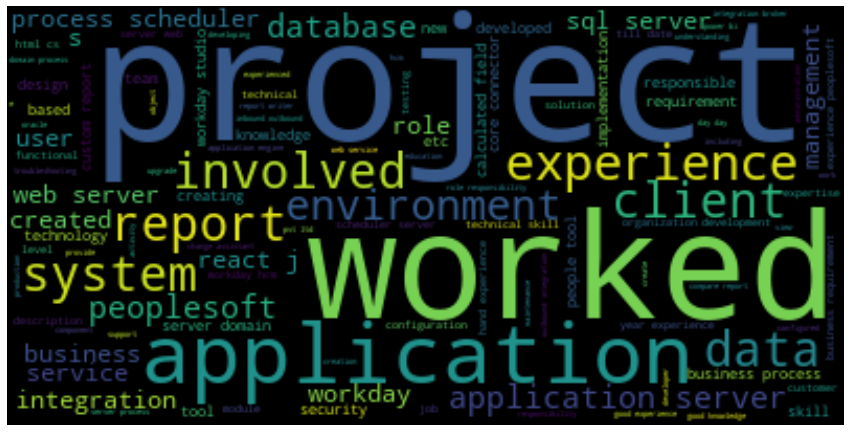

In [62]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = final.Clean_Resume
cleanedSentences = ""
for i in range(len(final.Clean_Resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most Frequent Words

In [63]:
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 556), ('server', 471), ('application', 463), ('report', 448), ('peoplesoft', 395), ('workday', 368), ('integration', 344), ('project', 315), ('data', 298), ('process', 280), ('database', 266), ('business', 256), ('system', 228), ('sql', 220), ('web', 204), ('knowledge', 193), ('tool', 189), ('worked', 189), ('requirement', 188), ('client', 185), ('environment', 182), ('involved', 173), ('role', 166), ('like', 162), ('service', 161), ('skill', 158), ('creating', 156), ('support', 155), ('team', 155), ('good', 154), ('user', 154), ('development', 150), ('hcm', 150), ('working', 149), ('change', 144), ('technical', 140), ('testing', 138), ('design', 137), ('technology', 136), ('issue', 136), ('people', 133), ('domain', 130), ('production', 128), ('created', 127), ('responsibility', 127), ('eib', 123), ('react', 123), ('security', 122), ('management', 118), ('oracle', 116)]


In [64]:
from collections import Counter

In [65]:
import seaborn as sns

In [66]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])],color=["g","b","r","m"])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.show()

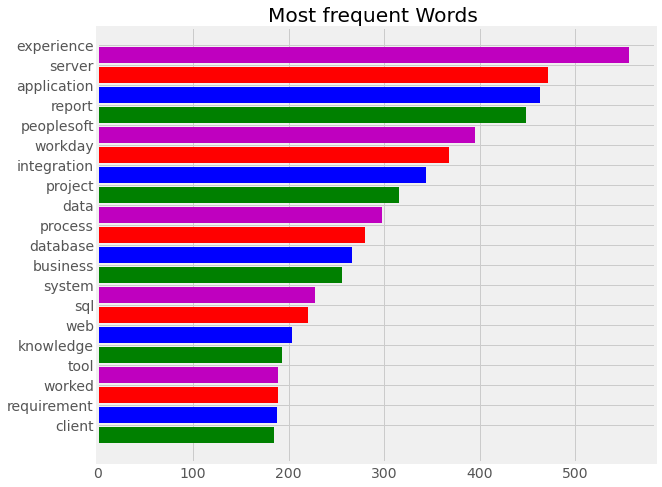

In [67]:
plt.figure(figsize=(10,8))
wordBarGraphFunction(final,"Clean_Resume","Most frequent Words ")

In [68]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

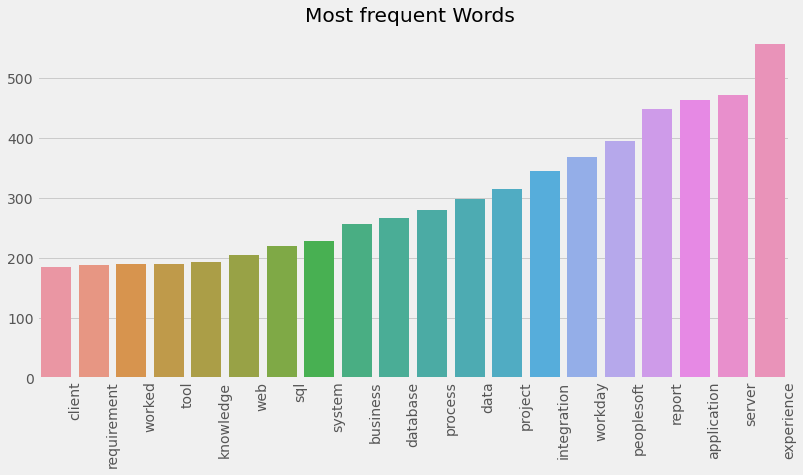

In [69]:
plt.figure(figsize=(12,6))
wordBarGraphFunction_1(final,"Clean_Resume","Most frequent Words ")

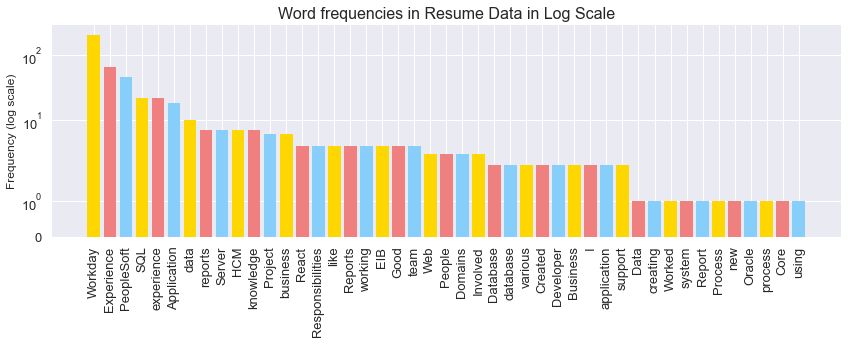

In [134]:
words =['using','Workday','Experience','PeopleSoft',
 'experience','SQL','Application','data','Server',
 'business','Project','reports','like','HCM','Worked',
 'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
 'Created', 'Responsibilities','Process','process','support', 
 'application','new','People','I','team','working', 
 'Database','database','Integration','Domains','client', 
 'requirements','Core',  'Business', 
'Oracle','Report', 'Developer', 'Data']
indices = np.random.zipf(1.6, size=500).astype(np.int) % len(words)
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
plt.bar(x, y, color=['gold','lightcoral', 'lightskyblue'])
plt.title("Word frequencies in Resume Data in Log Scale")
plt.ylabel("Frequency (log scale)")
plt.yscale('symlog') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
#for i, (tag, count) in enumerate(tf.most_common(50)):
    #plt.text(i, count, f' {count} ', rotation=90,
             #ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
#plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

## Final DataFrame

In [71]:
resume_data=pd.DataFrame()

In [72]:
resume_data["Resume"]=final["Clean_Resume"]
resume_data["category"]=final["label"]

In [73]:
resume_data

Resume        category
0   anil kumar maddukuri sql msbi developer summar...    SQLDeveloper
1   aradhana tripathi current location gachibowli ...    SQLDeveloper
2   buddha vamsi career objective year experience ...    SQLDeveloper
3   kamballa pradeep synopsis looking forward aspi...    SQLDeveloper
4   admin hyderabad nazeer basha sql power bi deve...    SQLDeveloper
..                                                ...             ...
72  pranish sonone career summary experience year ...  ReactDeveloper
73  ranga gaganam having year successful experienc...  ReactDeveloper
74  shaik abdul sharuk year experience wipro caree...  ReactDeveloper
75  ravali p curriculum vitae specialization compu...      Internship
76  susovan bag seeking challenging position field...      Internship

[77 rows x 2 columns]

## Labelling

In [74]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [75]:
resume_data["Encoded_Skill"]=le_encoder.fit_transform(resume_data["category"])

In [76]:
resume_data

Resume        category  \
0   anil kumar maddukuri sql msbi developer summar...    SQLDeveloper   
1   aradhana tripathi current location gachibowli ...    SQLDeveloper   
2   buddha vamsi career objective year experience ...    SQLDeveloper   
3   kamballa pradeep synopsis looking forward aspi...    SQLDeveloper   
4   admin hyderabad nazeer basha sql power bi deve...    SQLDeveloper   
..                                                ...             ...   
72  pranish sonone career summary experience year ...  ReactDeveloper   
73  ranga gaganam having year successful experienc...  ReactDeveloper   
74  shaik abdul sharuk year experience wipro caree...  ReactDeveloper   
75  ravali p curriculum vitae specialization compu...      Internship   
76  susovan bag seeking challenging position field...      Internship   

    Encoded_Skill  
0               3  
1               3  
2               3  
3               3  
4               3  
..            ...  
72              2  
73              2  
74              2  
75              0  
76              0  

[77 rows x 3 columns]

In [77]:
resume_data.isna().sum()

Resume           0
category         0
Encoded_Skill    0
dtype: int64

In [78]:
resume_data.describe()

Encoded_Skill
count      77.000000
mean        2.402597
std         1.216766
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         4.000000

In [79]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resume         77 non-null     object
 1   category       77 non-null     object
 2   Encoded_Skill  77 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 1.6+ KB


##  Vectorization

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
requiredText = resume_data["Resume"].values
requiredTarget = resume_data["Encoded_Skill"].values

## TF-IDF

In [82]:
'''
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=2000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=2000)
char_vectorizer.fit(requiredText)
CharFeatures = char_vectorizer.transform(requiredText)
totalFeatures = hstack([WordFeatures, CharFeatures])
'''
word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,random_state=42, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
#
#min_df=3,  max_features=None, 
            #strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            #stop_words = 'english'
#ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), stop_words = 'english')


Feature completed .....
(53, 1500)
(24, 1500)


In [83]:
X_train.shape,y_train.shape

((53, 1500), (53,))

In [84]:
X_test.shape,y_test.shape

((24, 1500), (24,))

In [85]:
print("X_train:\n",X_train)
print("---------------------------------------------")
print("X_test:\n",X_test)

X_train:
   (0, 1498)	0.045200756634497775
  (0, 1483)	0.10802135398645271
  (0, 1480)	0.1252629145858093
  (0, 1474)	0.2292574539269587
  (0, 1423)	0.19644684624559328
  (0, 1416)	0.07442478518043137
  (0, 1412)	0.12224595283268083
  (0, 1407)	0.10189885894793967
  (0, 1378)	0.053556348493285486
  (0, 1373)	0.0622448860308164
  (0, 1363)	0.14246979972373655
  (0, 1350)	0.08715094823851705
  (0, 1345)	0.05013986840397371
  (0, 1344)	0.07685583156420743
  (0, 1319)	0.06404151121394701
  (0, 1312)	0.05650873767946626
  (0, 1265)	0.16404112345838995
  (0, 1264)	0.1409201109409205
  (0, 1247)	0.09831769100489962
  (0, 1238)	0.046984452426541826
  (0, 1235)	0.14728898021641304
  (0, 1119)	0.0756224304530383
  (0, 1117)	0.06137504613692358
  (0, 1069)	0.0807936544559239
  (0, 1066)	0.09754579769790081
  :	:
  (52, 256)	0.1112018404973727
  (52, 252)	0.11867958627146726
  (52, 250)	0.03981191630644236
  (52, 248)	0.05249958076756264
  (52, 247)	0.06886767745084549
  (52, 229)	0.06588979523354

# Model Building|| Model Training

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

## 1.LogisticRegression

In [87]:
lr = LogisticRegression(class_weight ='balanced')
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)
print("Logistic Regression Train Accuracy: {}%".format(round(lr.score(X_train,y_train)*100,2)))
print("Logistic Regression Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))
lr_cm = confusion_matrix(y_test, lr_prediction)
print("Classification Report:\n")
print(classification_report(y_test, lr_prediction))

Logistic Regression Train Accuracy: 100.0%
Logistic Regression Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



## 2.KNeighborsClassifier

In [88]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(X_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)

print('Classification Report:\n')

print(classification_report(y_test, knn_prediction))

KNN Classification Train Accuracy: 100.0%
KNN Classification Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



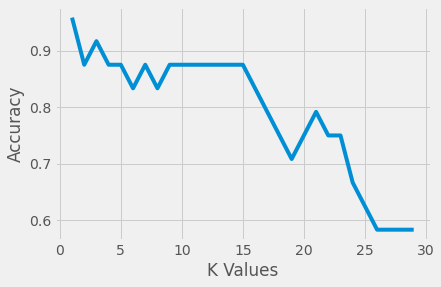

In [89]:
#Find Best K Value

score_list = []
for each in range(1,30):
    knn2 =OneVsRestClassifier(KNeighborsClassifier(n_neighbors=each, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,30), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

## 3. Support Vector Machine

In [90]:
svm = OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train,y_train)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))
svm_cm = confusion_matrix(y_test, svm_prediction)

print("Classification Report:\n")

print(classification_report(y_test, svm_prediction))

SVM Classification Train Accuracy: 100.0%
SVM Classification Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



## 4. Naive Bayes Classifier

In [91]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 0.92
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.83      0.91         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       0.86      1.00      0.92         6

    accuracy                           0.92        24
   macro avg       0.75      0.77      0.75        24
weighted avg       0.89      0.92      0.90        24




## 5.DecisionTreeClassifier

In [111]:
dt = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",splitter='best',max_depth=None)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)

print("Classification Report:\n")

print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 100.0%
Decision Tree Classification Test Accuracy: 75.0%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.54      1.00      0.70         7
           3       1.00      1.00      1.00         4
           4       1.00      0.17      0.29         6

    accuracy                           0.75        24
   macro avg       0.71      0.63      0.60        24
weighted avg       0.82      0.75      0.69        24



## 6.Random Forest Classifier

In [105]:
rf =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_features='auto',random_state=None,
 class_weight="balanced")
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:\n")
print(classification_report(y_test, rf_prediction))


Random Forest Classification Train Accuracy: 100.0%
Random Forest Classification Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



## Hyper Parameter Tweaking:

## Grid_Search CV

In [94]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =rf,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_.fit(X_train,y_train)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'entropy', 'max_depth': 2}
0.9818181818181818


In [95]:
train_accuracy_1=[]
test_accuracy_1=[]
for depth in range(1,10):
    model_2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth,max_features='auto',random_state=None,
 class_weight="balanced")
    model_2.fit(X_train,y_train)
    train_accuracy_1.append(model_2.score(X_train,y_train))
    test_accuracy_1.append(model_2.score(X_test,y_test))

Text(0, 0.5, 'performance')

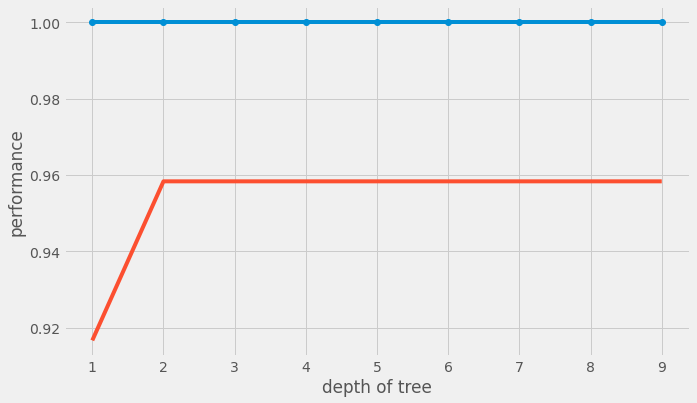

In [96]:
frame_1=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy_1,'test_acc':test_accuracy_1})
plt.figure(figsize=(10,6))
plt.plot(frame_1["max_depth"],frame_1["train_acc"],marker='o')
plt.plot(frame_1["max_depth"],frame_1["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

In [97]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

## 7.XGB Classifier

In [98]:
adb_classifier  = AdaBoostClassifier()
gb_classifier   = GradientBoostingClassifier()
xgb_classifer   = XGBClassifier()
lgbm_classifier = LGBMClassifier()

In [99]:
xgb_classifer= XGBClassifier(n_estimators=200,max_depth=6,booster="gbtree",learning_rate=0.005)
xgb_classifer.fit(X_train,y_train)
xgb_prediction = xgb_classifer.predict(X_test)
xgb_score = xgb_classifer.score(X_test, y_test)
print("\n")
print("XGB Classification Train Accuracy: {}%".format(round(xgb_classifer.score(X_train,y_train)*100,2)))
print("XGB Classification Test Accuracy: {}%".format(round(xgb_classifer.score(X_test,y_test)*100,2)))
xgb_classifer_cm = confusion_matrix(y_test, xgb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, xgb_prediction))


[14:26:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGB Classification Train Accuracy: 100.0%
XGB Classification Test Accuracy: 95.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.78      0.80      0.79        24
weighted avg       0.92      0.96      0.94        24



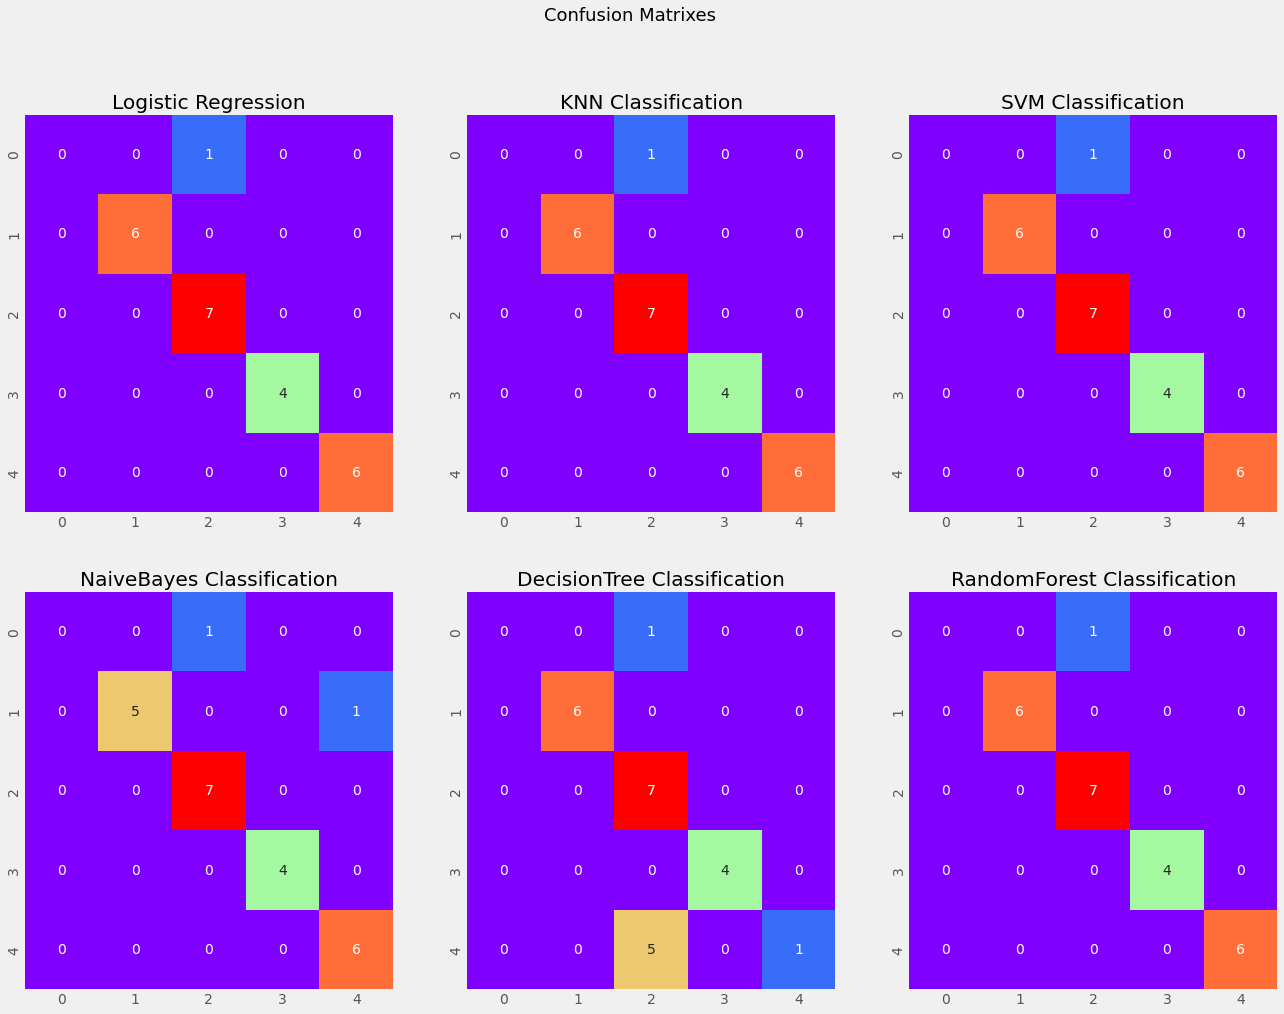

In [113]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,2)
plt.title("KNN Classification")
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,3)
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,4)
plt.title("NaiveBayes Classification")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,5)
plt.title("DecisionTree Classification")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,6)
plt.title("RandomForest Classification")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.show()

In [114]:
TN = [lr_cm[0,0], knn_cm[0,0], svm_cm[0,0], nb_cm[0,0], dt_cm[0,0], rf_cm[0,0],xgb_classifer_cm[0,0]]
FP = [lr_cm[0,1], knn_cm[0,1], svm_cm[0,1], nb_cm[0,1], dt_cm[0,1], rf_cm[0,1],xgb_classifer_cm[0,1]]
FN = [lr_cm[1,0], knn_cm[1,0], svm_cm[1,0], nb_cm[1,0], dt_cm[1,0], rf_cm[1,0],xgb_classifer_cm[1,0]]
TP = [lr_cm[1,1], knn_cm[1,1], svm_cm[1,1], nb_cm[1,1], dt_cm[1,1], rf_cm[1,1],xgb_classifer_cm[1,1]]
Accuracy = [lr_score, knn_score, svm_score, nb_score, dt_score, rf_score,xgb_score]
#MSE = [lr_mse, knn_mse, svm_mse, nb_mse, dt_mse, rf_mse]
Classification = ["Logistic Regression", "KNN Classification", "SVM Classification", "Naive Bayes Classification", 
                  "Decision Tree Classification", "Random Forest Classification","Xgboost Classifier"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_1=pd.DataFrame(data_dict)

In [115]:
df_1

Model  TN  FP  FN  TP  Accuracy
0           Logistic Regression   0   0   0   6  0.958333
1            KNN Classification   0   0   0   6  0.958333
2            SVM Classification   0   0   0   6  0.958333
3    Naive Bayes Classification   0   0   0   5  0.916667
4  Decision Tree Classification   0   0   0   6  0.750000
5  Random Forest Classification   0   0   0   6  0.958333
6            Xgboost Classifier   0   0   0   6  0.958333

In [116]:
trace1 = {
    'x':df_1.Model,
    'y':df_1.TN,
    'name':'True Negative',
    'type':'bar'}

trace2 = {
    'x':df_1.Model,
    'y':df_1.FP,
    'name':'False Positive',
    'type':'bar'}

trace3 = {
    'x':df_1.Model,
    'y':df_1.FN,
    'name':'False Negative',
    'type':'bar'}

trace4 = {
    'x':df_1.Model,
    'y':df_1.TP,
    'name':'True Positive',
    'type':'bar'}

graph = [trace1, trace2, trace3, trace4];
layout = {
  'xaxis': {'title': 'Classification Models'},
  'barmode': 'relative',
  'title': 'Confusion Matrix Values of Classification Models'
};
fig = go.Figure(data = graph, layout = layout)
iplot(fig)

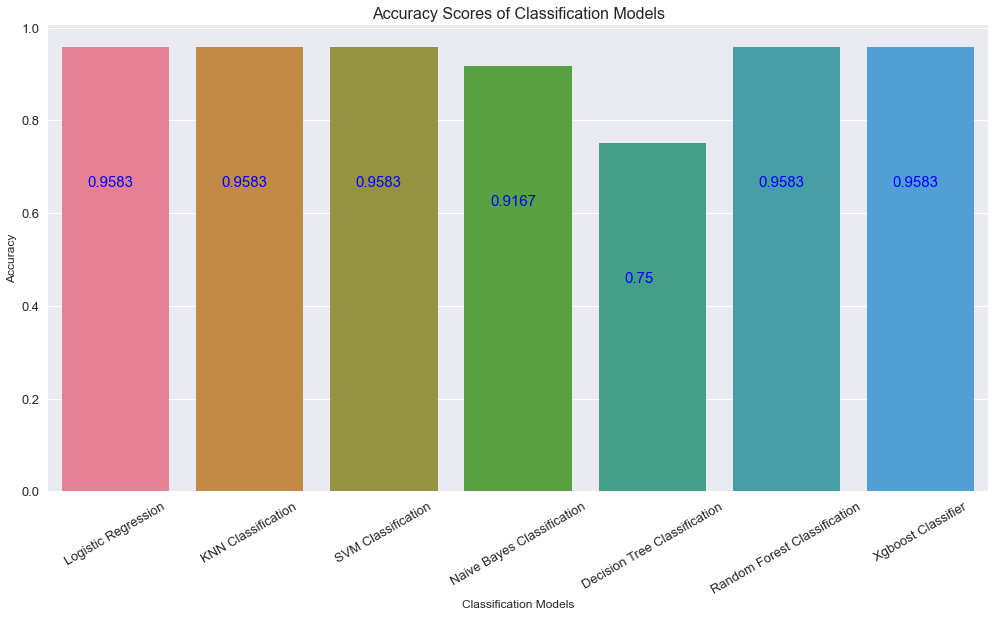

In [131]:
#Accuracy
plt.figure(figsize=(15,8))
ax= sns.barplot(x=df_1.Model, y=df_1.Accuracy, palette =sns.color_palette("husl", 9) )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.style.use('seaborn-dark-palette')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()
#sns.cubehelix_palette(len(df_1.Model)

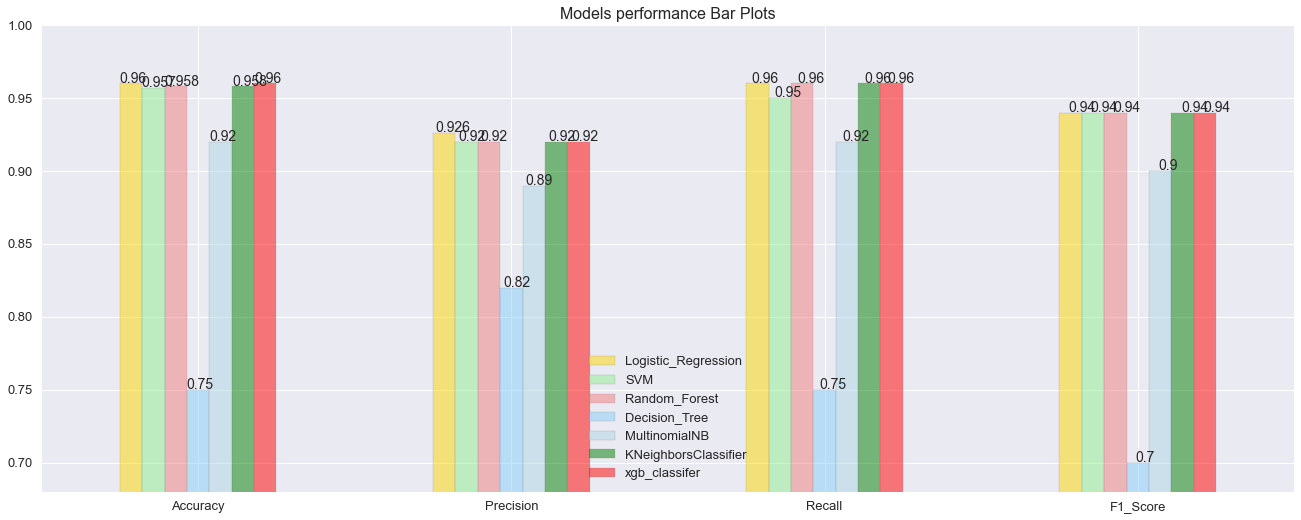

In [129]:
models_metrics = {
                  "Logistic_Regression"  :[0.96 , 0.926, 0.96, 0.94], 
                  "SVM"      :    [0.957, 0.92, 0.95 , 0.94],
                  "Random_Forest" :  [0.958,   0.92 , 0.96  , 0.94],
                  "Decision_Tree" : [0.75, 0.82 ,0.75 , 0.70],
                  "MultinomialNB" :[  0.92,0.89 , 0.92 ,0.90],
                  "KNeighborsClassifier"  : [0.958,0.92 ,0.96 ,0.94],
                  "xgb_classifer"  :[0.96, 0.92 , 0.96 , 0.94  ],

                }
df_111 = pd.DataFrame(data = models_metrics)
df_111.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall',3:"F1_Score"}, 
                 inplace=True)
ax = df_111.plot(kind='bar', figsize = (20,8), ylim = (0.68, 1.00), 
        color = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue',"lightblue","green","red"],
        rot = 0, title ='Models performance Bar Plots',
        edgecolor = 'grey', alpha = 0.5)
plt.style.use('seaborn-dark-palette')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()